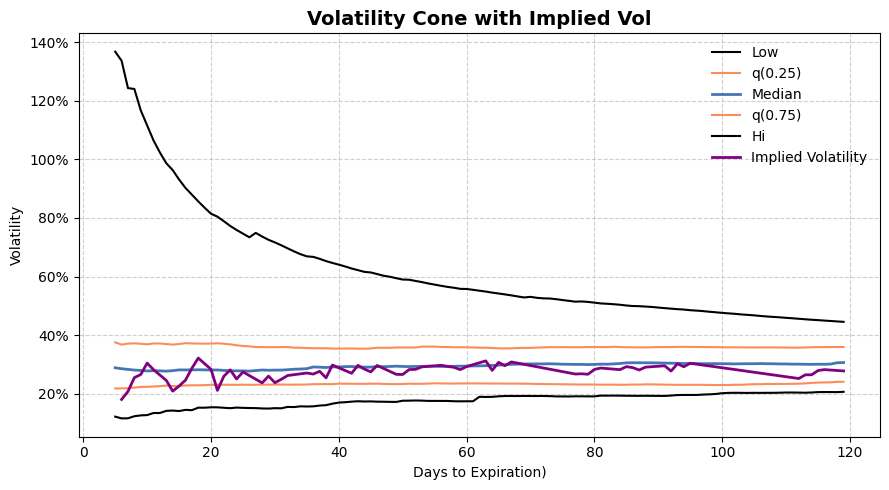

<Axes: title={'center': 'Volatility Cone with Implied Vol'}, xlabel='Days to Expiration)', ylabel='Volatility'>

In [1]:
import sys, pandas as pd, numpy as np, yfinance as yf, importlib
sys.path.append("../src")

import vol_cone

df1 = pd.read_csv("../data/aapl_eod_202303.csv")
ticker = yf.Ticker("AAPL")
df2 = ticker.history(period="60mo")

#windows = [20, 40, 60, 120, 240]
windows = tuple(range(5, 120))
summary = vol_cone.five_n_sum(df2, windows=windows, T = 1210)

iv_curve = vol_cone.iv_curve_from_snapshot(df1)

# Plot with IV overlay
vol_cone.plot_realized_vol_cone(
    summary,
    title="Volatility Cone with Implied Vol",
    iv_curve=iv_curve
)


Date
2020-08-28 00:00:00-04:00         NaN
2020-08-31 00:00:00-04:00         NaN
2020-09-01 00:00:00-04:00         NaN
2020-09-02 00:00:00-04:00         NaN
2020-09-03 00:00:00-04:00         NaN
                               ...   
2025-08-21 00:00:00-04:00    0.276135
2025-08-22 00:00:00-04:00    0.276251
2025-08-25 00:00:00-04:00    0.276175
2025-08-26 00:00:00-04:00    0.276912
2025-08-27 00:00:00-04:00    0.275413
Name: rvol_30d, Length: 1255, dtype: float64
Date
2020-08-28 00:00:00-04:00         NaN
2020-08-31 00:00:00-04:00         NaN
2020-09-01 00:00:00-04:00         NaN
2020-09-02 00:00:00-04:00         NaN
2020-09-03 00:00:00-04:00         NaN
                               ...   
2025-08-21 00:00:00-04:00    0.276135
2025-08-22 00:00:00-04:00    0.276251
2025-08-25 00:00:00-04:00    0.276175
2025-08-26 00:00:00-04:00    0.276912
2025-08-27 00:00:00-04:00    0.275413
Name: rvol_30d, Length: 1255, dtype: float64


<Axes: title={'center': 'Historical Volatility'}, xlabel='Date'>

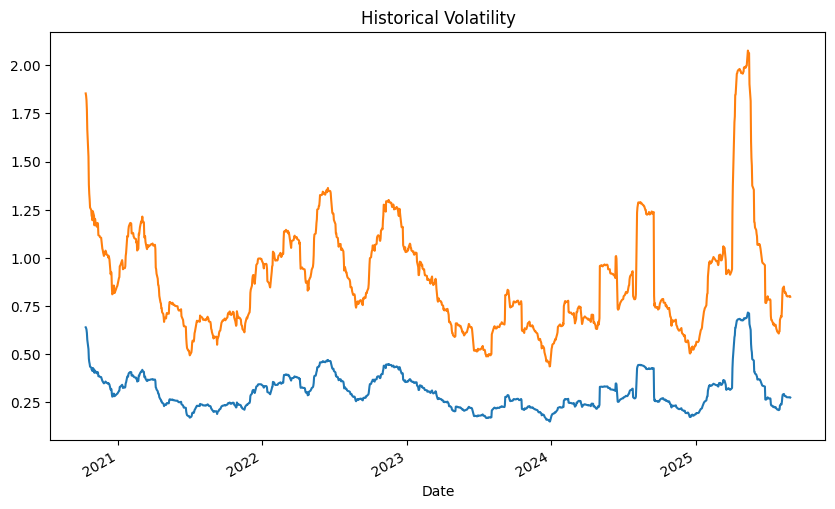

In [2]:
import sys, pandas as pd, numpy as np, yfinance as yf, importlib
from arch import arch_model
sys.path.append("../src")

import r_vol
df1 = pd.read_csv("../data/aapl_eod_202303.csv")
ticker = yf.Ticker("AAPL")
df2 = ticker.history(period="60mo")
#windows = [20, 40, 60, 120, 240]
windows = tuple(range(5, 120))
# Plot log returns to visualize the data
r_vol.yz_vol_series(r_vol.prep_index(df2), 30, 242).plot(title='Historical Volatility', figsize=(10, 6))

r_vol.ann_vol(r_vol.yz_vol_series(r_vol.prep_index(df2), 30, 242), 30).plot(title='Historical Volatility', figsize=(10, 6))


